In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy

In [10]:
IDEX_address = ['0x2a0c0DBEcC7E4D658f48E01e3fA353F44050c208'.lower()]
Kyber_address = [
'0x964F35fAe36d75B1e72770e244F6595B68508CF5'.lower(),
'0x63825c174ab367968EC60f061753D3bbD36A0D8F'.lower(),
'0x818E6FECD516Ecc3849DAf6845e3EC868087B755'.lower()
]
Forkdelta_address = ['0x8d12a197cb00d4747a1fe03395095ce2a5cc6819'.lower()]

contract_address = [IDEX_address, Kyber_address, Forkdelta_address]
contract_number = 3

chunkSize = 1000000
chunkNum = 40

transactions_chunk = pd.read_csv('../../transactions.csv',sep='\s+|"',engine='python',chunksize=chunkSize,skiprows=1,names=['first_Na','id','hash','nonce','block_hash','block_number','transaction_index','from_address','to_address','value','gas','gas_price','input','block_timestamp','Last_Na'],usecols=range(1,14))

gas_price_sum = [0]*contract_number
length = [0]*contract_number

i=0
for chunk in transactions_chunk:
    
    print(i, gas_price_sum, length)
    
    if(i>=chunkNum):
        break
    i+=1
    
    for num in range(0, contract_number):
        for contract in contract_address[num]:
            gas_price_sum[num] = gas_price_sum[num] + numpy.sum((chunk.loc[chunk['to_address'] == contract])['gas_price'].astype(int))
            length[num] = length[num] + len(chunk.loc[chunk['to_address'] == contract].index)
            gas_price_sum[num] = gas_price_sum[num] + numpy.sum((chunk.loc[chunk['from_address'] == contract])['gas_price'].astype(int))
            length[num] = length[num] + len(chunk.loc[chunk['from_address'] == contract].index)

print('iteration', i)
for num in range(0, contract_number):
    print(num, gas_price_sum[num]/length[num])
    

(0, [0, 0, 0], [0, 0, 0])
(1, [86686120329018, 7365609573116, 22787346013580], [16013, 1168, 3874])
(2, [190007669309487, 18460688549473, 48159860967864], [31937, 2648, 7979])
(3, [255842465023861, 26199597338984, 69840521684376], [45311, 3739, 12064])
(4, [347713030540631, 36389591398319, 101159900885668], [60036, 5242, 16428])
(5, [487255272421393, 50642580237823, 141293194360693], [77581, 6906, 21281])
(6, [632759280666441, 60190715897747, 195644346084235], [98427, 8153, 28219])
(7, [788329026731102, 69780702645498, 230058780774865], [121990, 9447, 34132])
(8, [889659483976395, 77988824612337, 269200839255059], [138595, 10541, 39187])
(9, [1061719108202050, 94384849716210, 304478197277322], [157758, 12199, 44045])
(10, [1275171802076991, 119085333521337, 347697536588427], [177654, 14364, 49789])
(11, [1422355615862180, 130994377532027, 385951079724227], [195736, 15755, 55125])
(12, [1517389590363436, 137856213138031, 420968136908102], [212467, 16872, 59445])
(13, [1632898491833663, 

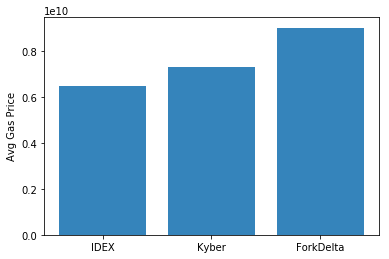

In [11]:
objects = ('IDEX', 'Kyber', 'ForkDelta')
y_pos = numpy.arange(len(objects))
performance = [gas_price_sum[0]/length[0], gas_price_sum[1]/length[1], gas_price_sum[2]/length[2]]

plt.bar(y_pos, performance, align='center', alpha=0.9)
plt.xticks(y_pos, objects)
plt.ylabel('Avg Gas Price')

plt.show()

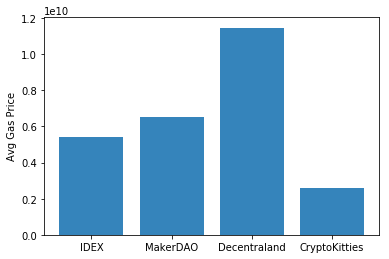

In [13]:
objects = ('IDEX', 'MakerDAO', 'Decentraland', 'CryptoKitties')
y_pos = numpy.arange(len(objects))
performance = [5413484064, 6532569929, 11469721042, 2605700931]

plt.bar(y_pos, performance, align='center', alpha=0.9)
plt.xticks(y_pos, objects)
plt.ylabel('Avg Gas Price')

plt.show()